In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEWZUT5/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEWZUT5/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEWZUT5/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [5]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [6]:
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 4s 12ms/step - loss: 0.6232 - accuracy: 0.6438 - val_loss: 0.4133 - val_accuracy: 0.8248
Epoch 2/10
196/196 [==============================] - 3s 15ms/step - loss: 0.3270 - accuracy: 0.8632 - val_loss: 0.3323 - val_accuracy: 0.8572
Epoch 3/10
196/196 [==============================] - 2s 11ms/step - loss: 0.2148 - accuracy: 0.9216 - val_loss: 0.3467 - val_accuracy: 0.8506
Epoch 4/10
196/196 [==============================] - 2s 10ms/step - loss: 0.1336 - accuracy: 0.9598 - val_loss: 0.3857 - val_accuracy: 0.8406
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0697 - accuracy: 0.9869 - val_loss: 0.4446 - val_accuracy: 0.8322
Epoch 6/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0317 - accuracy: 0.9973 - val_loss: 0.4817 - val_accuracy: 0.8320
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0148 - accuracy: 0.9992 - val_loss: 0.5194 - val_accuracy: 0.8313

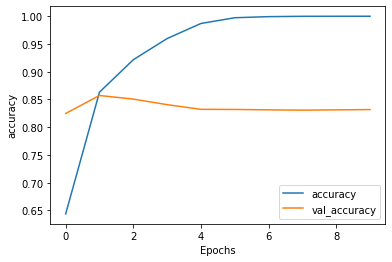

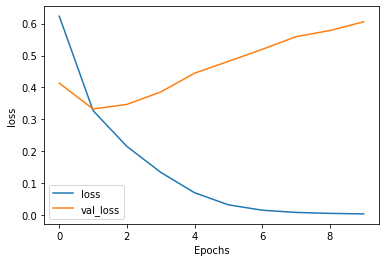

In [8]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [9]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
196/196 [==============================] - 44s 176ms/step - loss: 0.5284 - accuracy: 0.7154 - val_loss: 0.4166 - val_accuracy: 0.8240
Epoch 2/10
196/196 [==============================] - 42s 217ms/step - loss: 0.3169 - accuracy: 0.8715 - val_loss: 0.3530 - val_accuracy: 0.8446
Epoch 3/10
196/196 [==============================] - 32s 162ms/step - loss: 0.2499 - accuracy: 0.9047 - val_loss: 0.3863 - val_accuracy: 0.8466
Epoch 4/10
196/196 [==============================] - 32s 162ms/step - loss: 0.2136 - accuracy: 0.9195 - val_loss: 0.4104 - val_accuracy: 0.8328
Epoch 5/10
196/196 [==============================] - 35s 177ms/step - loss: 0.1813 - accuracy: 0.9348 - val_loss: 0.4258 - val_accuracy: 0.8295
Epoch 6/10
196/196 [==============================] - 36s 186ms/step - loss: 0.1560 - accuracy: 0.9456 - val_loss: 0.4953 - val_accuracy: 0.8254
Epoch 7/10
196/196 [==============================] - 32s 162ms/step - loss: 0.1334 - accuracy: 0.9549 - val_loss: 0.4986 - val_ac

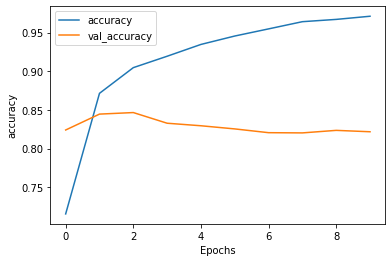

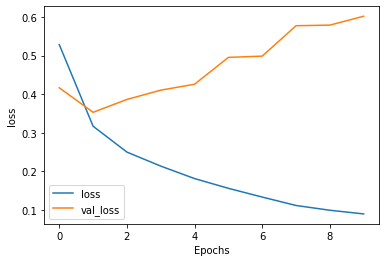

In [10]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [11]:
import tensorflow as tf

embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
196/196 [==============================] - 35s 161ms/step - loss: 0.5903 - accuracy: 0.6557 - val_loss: 0.4022 - val_accuracy: 0.8226
Epoch 2/10
196/196 [==============================] - 30s 153ms/step - loss: 0.3332 - accuracy: 0.8623 - val_loss: 0.3551 - val_accuracy: 0.8442
Epoch 3/10
196/196 [==============================] - 31s 160ms/step - loss: 0.2510 - accuracy: 0.9012 - val_loss: 0.3716 - val_accuracy: 0.8446
Epoch 4/10
196/196 [==============================] - 30s 153ms/step - loss: 0.2080 - accuracy: 0.9244 - val_loss: 0.3990 - val_accuracy: 0.8385
Epoch 5/10
196/196 [==============================] - 30s 153ms/step - loss: 0.1784 - accuracy: 0.9375 - val_loss: 0.4340 - val_accuracy: 0.8284
Epoch 6/10
196/196 [==============================] - 30s 153ms/step - loss: 0.1547 - accuracy: 0.9472 - val_loss: 0.4738 - val_accuracy: 0.8272
Epoch 7/10
196/196 [==============================] - 30s 155ms/step - loss: 0.1250 - accuracy: 0.9601 - val_loss: 0.5218 - val_ac

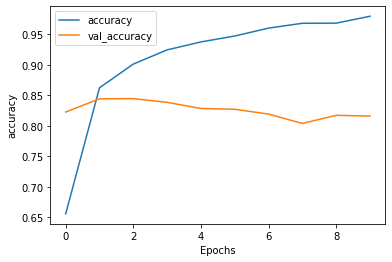

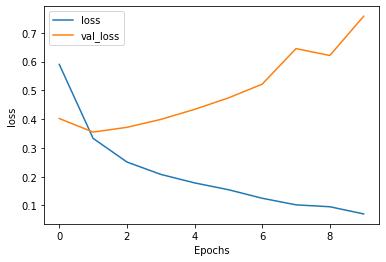

In [12]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [15]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_conv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

Epoch 1/10
196/196 [==============================] - 11s 51ms/step - loss: 0.5997 - accuracy: 0.6778 - val_loss: 0.3778 - val_accuracy: 0.8392
Epoch 2/10
196/196 [==============================] - 13s 65ms/step - loss: 0.3232 - accuracy: 0.8635 - val_loss: 0.3401 - val_accuracy: 0.8527
Epoch 3/10
196/196 [==============================] - 10s 52ms/step - loss: 0.2564 - accuracy: 0.8966 - val_loss: 0.3524 - val_accuracy: 0.8486
Epoch 4/10
196/196 [==============================] - 11s 57ms/step - loss: 0.2184 - accuracy: 0.9169 - val_loss: 0.3771 - val_accuracy: 0.8459
Epoch 5/10
196/196 [==============================] - 10s 51ms/step - loss: 0.1914 - accuracy: 0.9284 - val_loss: 0.4070 - val_accuracy: 0.8392
Epoch 6/10
196/196 [==============================] - 10s 51ms/step - loss: 0.1686 - accuracy: 0.9398 - val_loss: 0.4481 - val_accuracy: 0.8308
Epoch 7/10
196/196 [==============================] - 10s 52ms/step - loss: 0.1498 - accuracy: 0.9484 - val_loss: 0.4889 - val_accuracy:

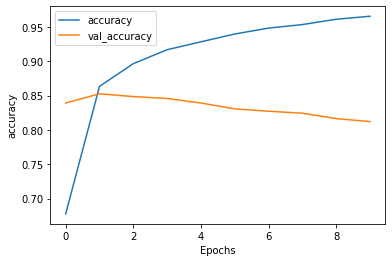

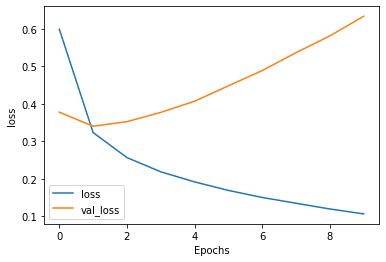

In [14]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')